In [29]:
import missingno as msn
import pandas as pd
import re
import numpy as np

In [30]:
df= pd.read_csv('./top-rated-coffee.csv')

In [31]:
df.head()

,coffee_name,total_score,roaster_location,coffee_origin,roast_level,agtron,est._price
0,Colombia Finca Campo Hermosa,94,"Cleveland, Tennessee","Quindio Department, Colombia",Light,62/82,$29.99/8 ounces
1,Colombia Finca La Sirena Mango Co-Ferment,94,"Cleveland, Tennessee","Quindio Department, Colombia",Light,63/87,$22.99/8 ounces
2,In Bloom,94,"Jersey City, New Jersey",Colombia; Ethiopia,Light,64/88,$25.00/250 grams
3,Ethiopia Washed Kaffa Gimbo Lot Rich Espresso,96,"Chia-Yi, Taiwan","Gimbo, Kaffa Province, Ethiopia",Medium-Light,55/77,NT $250/8 ounces
4,Ethiopia Natural Gute Bona,95,"Chia-Yi, Taiwan","Sidamo growing region, southern Ethiopia",Medium-Light,62/78,NT $400/8 ounces


In [32]:
df.shape

(2217, 7)

In [33]:
df.describe()

,coffee_name,total_score,roaster_location,coffee_origin,roast_level,agtron,est._price
count,2217,2217,2217,2211,2193,2217,2103
unique,2027,6,255,832,6,458,844
top,Ethiopia Kayon Mountain,94,"Madison, Wisconsin","Boquete growing region, western Panama",Medium-Light,62/80,$18.00/12 ounces
freq,7,1324,214,103,1264,98,45


In [34]:
df.iloc[20]

coffee_name                        Duwancho Natural Ethiopia
total_score                                               94
roaster_location                          Madison, Wisconsin
coffee_origin       Sidamo growing region, southern Ethiopia
roast_level                                            Light
agtron                                                 61/82
est._price                                  $28.00/12 ounces
Name: 20, dtype: object

In [35]:
df.iloc[5:10]

,coffee_name,total_score,roaster_location,coffee_origin,roast_level,agtron,est._price
5,White Geisha Blend Espresso,95,"Taichung, Taiwan",Panama; Ethiopia,Medium-Light,60/78,$39.00/8 ounces
6,Yunlin Natural Geisha CPAG-1,95,"Yunlin, Taiwan","Yunlin, Taiwan",Medium-Light,60/78,NT $800/4 ounces
7,Colombia Natural Huila Eulises Guzman,94,"Chia-Yi, Taiwan","Huila Department, Colombia",Medium-Light,60/80,NT $350/8 ounces
8,Peru Washed Cusco Buena Vista Soola SL09,94,"Chia-Yi, Taiwan","Cusco, Peru",Medium-Light,58/77,NT $300/4 ounces
9,Yunlin Natural Geisha,94,"Yunlin, Taiwan","Yunlin, Taiwan",Light,60/84,NT $600/4 ounces


In [36]:
df["coffee_origin"].unique()

array(['Quindio Department, Colombia', 'Colombia; Ethiopia',
       'Gimbo, Kaffa Province, Ethiopia',
       'Sidamo growing region, southern Ethiopia', 'Panama; Ethiopia',
       'Yunlin, Taiwan', 'Huila Department, Colombia', 'Cusco, Peru',
       'Caicendonia, Valle Del Cauca, Cauca Department, Colombia',
       'Piendamo, Cauca Department, Colombia',
       'Mbozi District, Songwe Region, Tanzania',
       'Gedeb District, Gedeo Zone, southern Ethiopia',
       'Guji Zone, Oromia Region, Southern Ethiopia',
       'San José de Minas, Pichincha Province, Ecuador',
       'Alajuela, Central Valley, Costa Rica',
       'Guji growing region, south-central Ethiopia',
       'Cerrado Mineiro, Minas Gerais, Brazil',
       'Algeciras, Huila Department, Colombia',
       'Santa Maria, Huila Department, Colombia',
       'Yirgacheffe growing region, southern Ethiopia',
       'Caicedonia, Cauca Department, Colombia',
       'Kirinyaga District, south-central Kenya',
       'Kaʻū growing re

<Axes: >

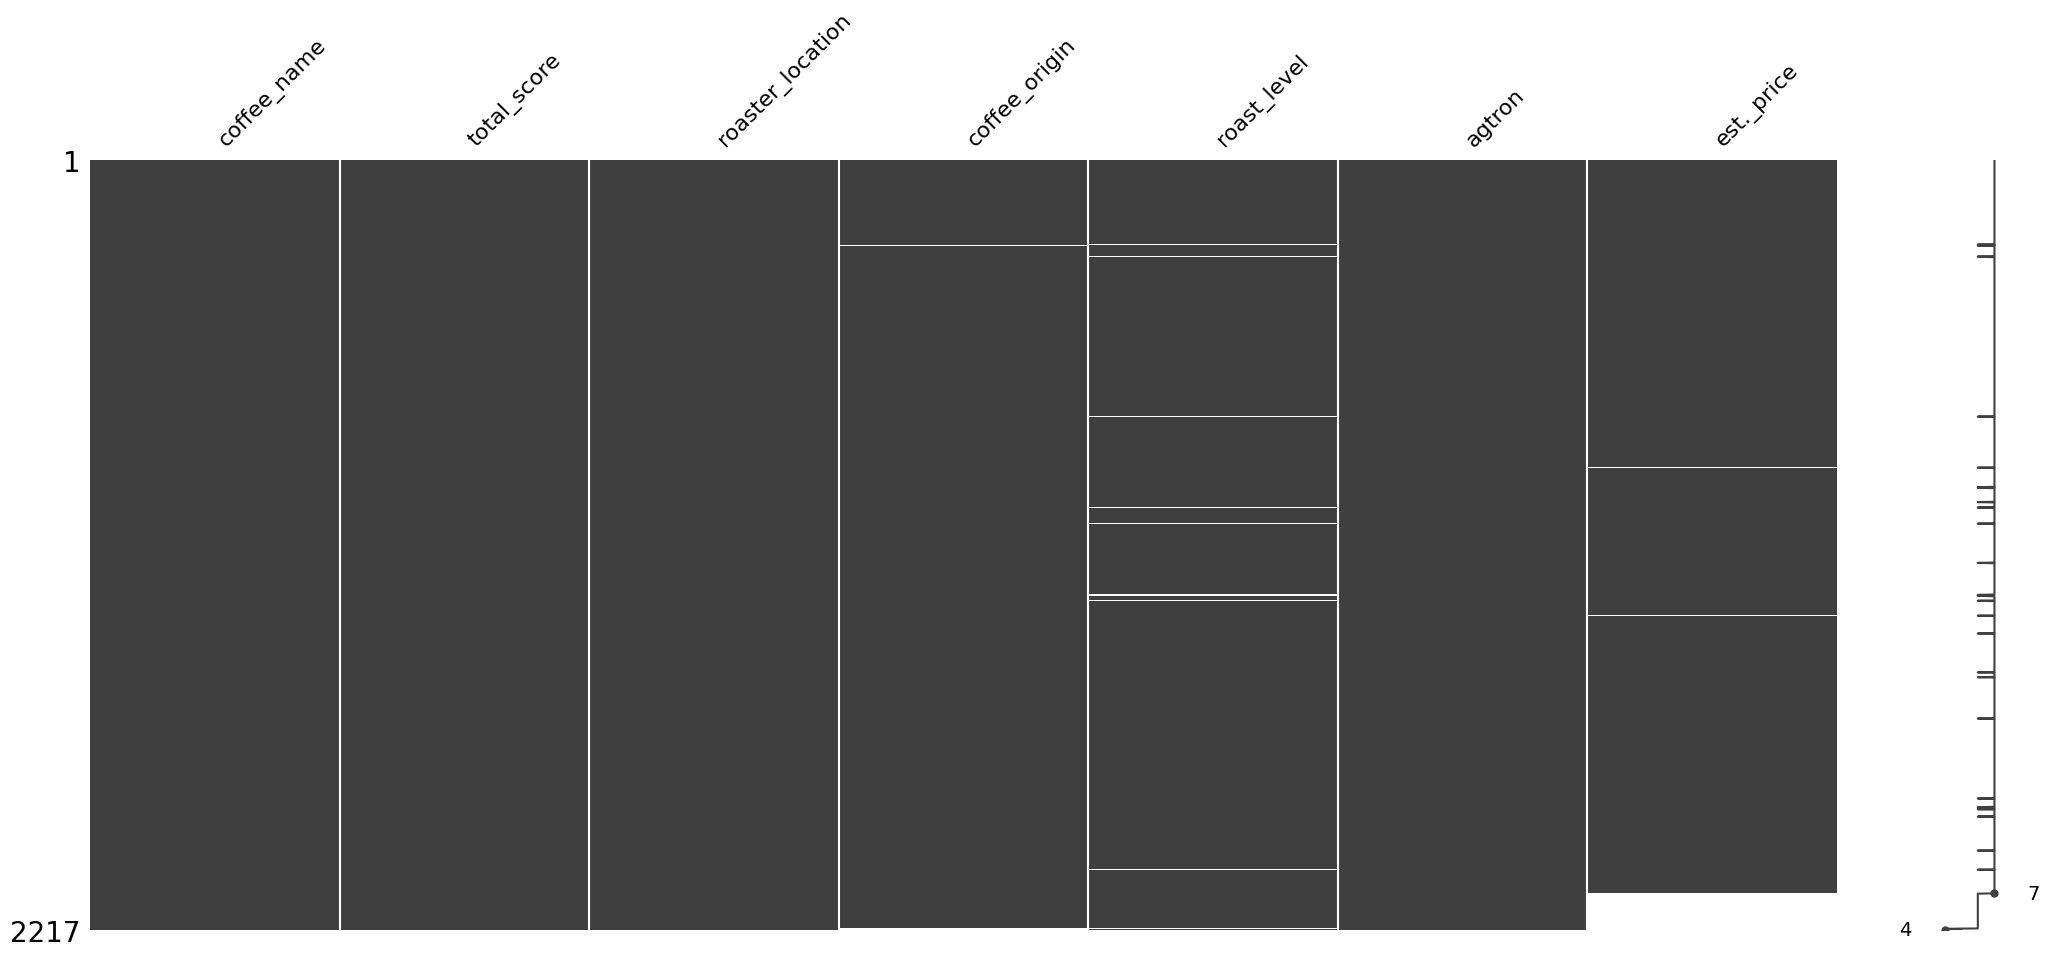

In [37]:
msn.matrix(df)

In [38]:
if df.duplicated().sum() > 0:
    df.drop_duplicates(inplace=True)
    df.reset_index(inplace=True, drop=True)

In [39]:
missing_percentage = df.isnull().mean() * 100
print("Missing values percentage by column:")
print(missing_percentage)

Missing values percentage by column:
coffee_name         0.000000
total_score         0.000000
roaster_location    0.000000
coffee_origin       0.270880
roast_level         1.038375
agtron              0.000000
est._price          5.146727
dtype: float64


In [40]:
df["total_score"] = pd.to_numeric(df["total_score"], errors="coerce")


In [41]:
df[["agtron_ground", "agtron_roast"]] = df["agtron"].str.split("/", expand=True)
df["agtron_ground"] = pd.to_numeric(df["agtron_ground"], errors="coerce")
df["agtron_roast"] = pd.to_numeric(df["agtron_roast"], errors="coerce")

In [42]:
df.drop(columns=["agtron"], inplace=True)

In [43]:
def clean_price(price):
    if pd.isna(price):
        return None
    price = price.replace("NT", "").replace("$", "").strip().lower()
    try:
        amount, unit = price.split("/")
        amount = float(amount)
        if "grams" in unit:
            return amount / 28.35
        elif "ounces" in unit:
            return amount
        else:
            return None
    except:
        return None

df["price_per_ounce"] = df["est._price"].apply(clean_price)


In [44]:
df["roast_level"] = df["roast_level"].str.replace("-", " ").str.title().str.strip()
df["coffee_origin"] = df["coffee_origin"].str.strip()

In [45]:
df["origin_country"] = df["coffee_origin"].str.extract(r'([A-Z][a-z]+)$')

<Axes: >

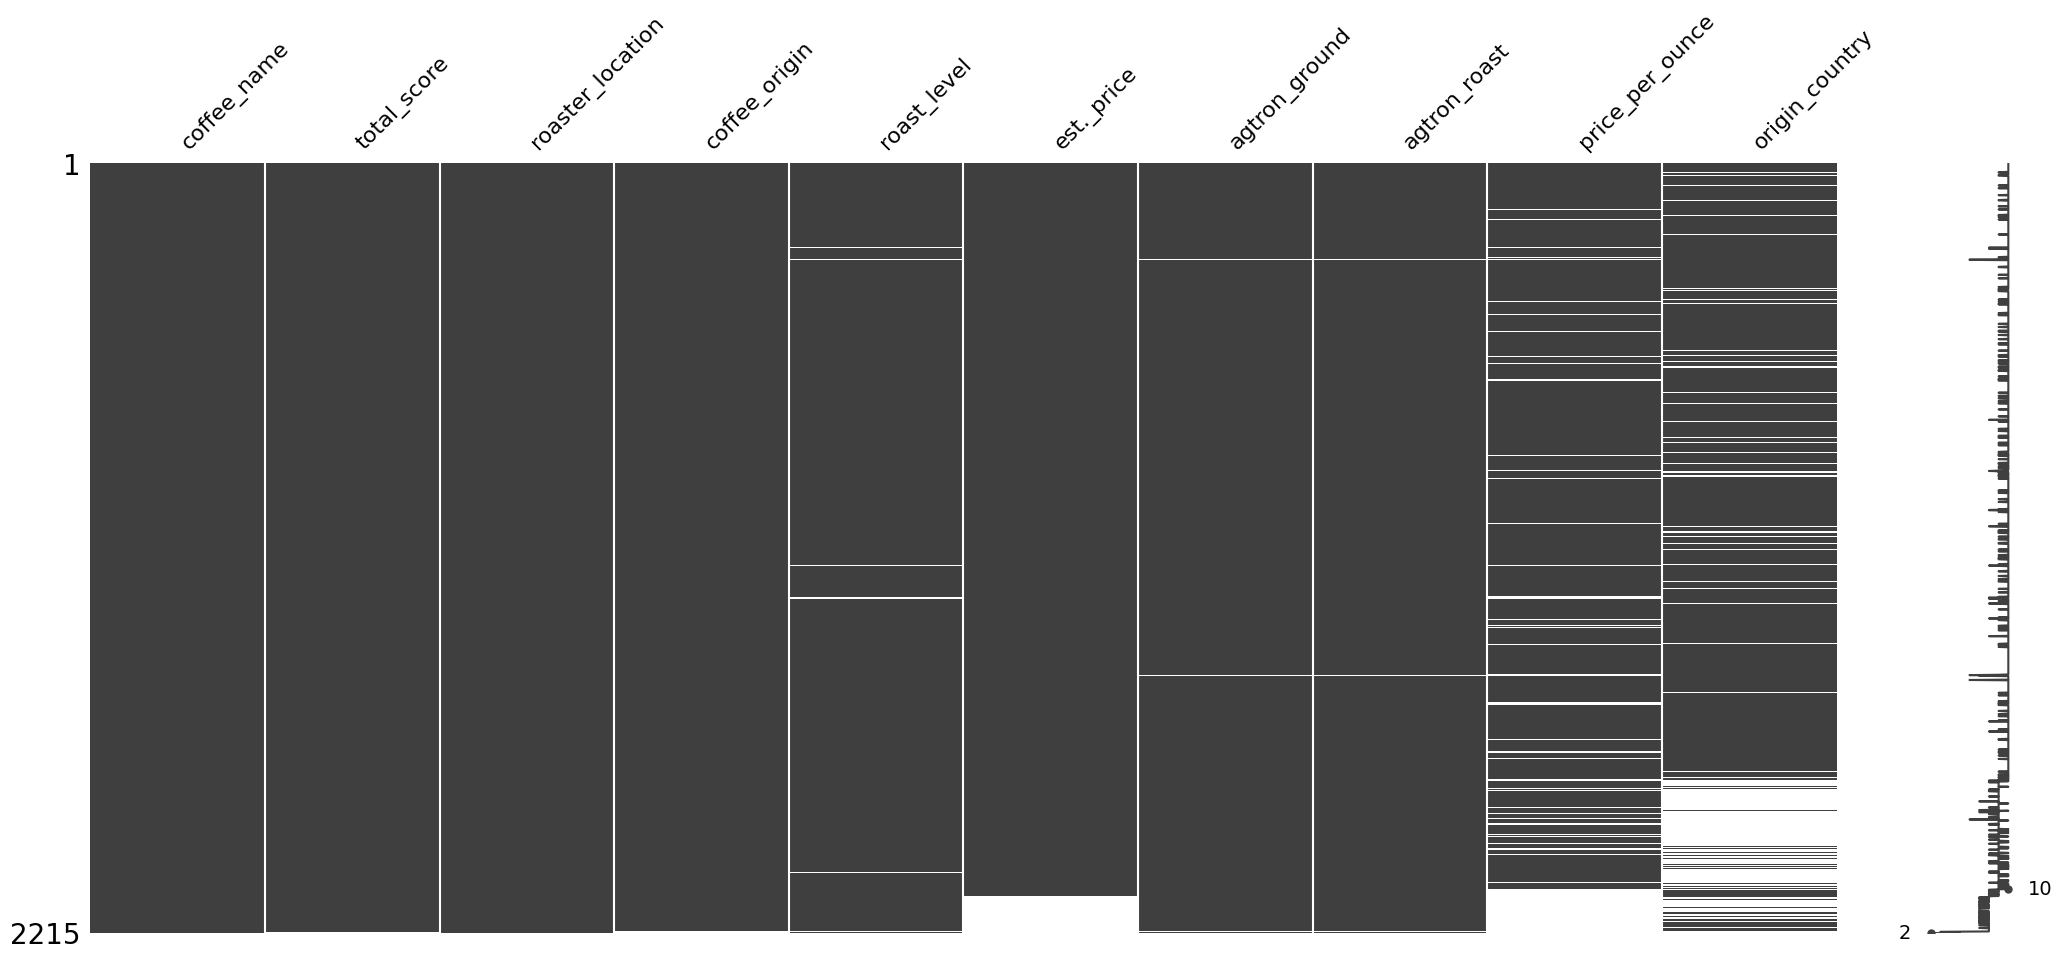

In [46]:
msn.matrix(df)

In [47]:
df.to_csv("top-rated-coffee-clean.csv", index=False)